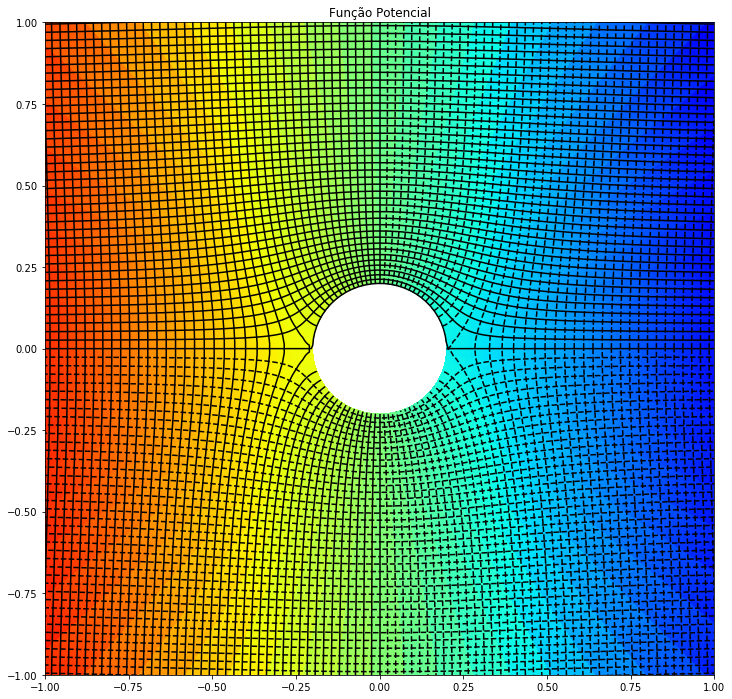

In [57]:
################################################################
## Disciplina de Mecânica dos Fluidos 2
## Exemplo de escoamento ao redor de um cilindro com rotação.
## Sua rotação é dada a partir da intensidade do dipolo, K.
## Os cálculos são feitos em coordenadas polares, mas os
## gráficos foram plotados em coordenadas cartesianas.
## Referência: Introdução à Mec. dos Fluidos - Fox et al.
################################################################

from numpy import pi, cos, sin, tan, log, sqrt
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def potencial(r, t, U=1.0, a=0.2, K=0.0):
    """Função potencial"""
    if K > 4*pi*U*a:
        K = 4*pi*U*a
    return -U*r*(1+pow(a/r,2))*cos(t)+K*t/(2*pi)

def corrente(r, t, U=1.0, a=0.2, K=0.0):
    """Função potencial"""
    if K > 4*pi*U*a:
        K = 4*pi*U*a
    return U*r*(1-pow(a/r,2))*sin(t)+K*log(r)/(2*pi)

def malha(Ro, R, Nr, Nt, L=1.0, H=1.0):
    r = np.linspace(Ro, R, Nr)
    t = np.linspace(0, 2*pi, Nt)
    for i in range(Nr):
        for j in range(Nt):
            plt.plot([r[i]*cos(t[j])], [r[i]*sin(t[j])], '.k', markersize=0.45)

Ro, R, Nr, Nt = 0.2, sqrt(2.0), 256, 64

r = np.linspace(Ro, R, Nr)
t = np.linspace(0, 2*pi, Nt)
X, Y = np.meshgrid(r,t)
Zp = potencial(X, Y)
Zc = corrente(X, Y)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

CS1 = ax.contour(X*cos(Y), X*sin(Y), Zp, 128, colors='k')
CS2 = ax.contour(X*cos(Y), X*sin(Y), Zc, 128, colors='k')

im = ax.pcolormesh(X*cos(Y), X*sin(Y), Zp, cmap=cm.jet)
plt.title('Função Potencial')

plt.xlim([-1.0, 1.0])
plt.ylim([-1.0, 1.0])

plt.show()